In [12]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
%matplotlib inline

df=pd.read_csv('evdataset.csv')
df.head()

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


In [13]:
df.isnull().sum()

id                             0
Make                           0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

In [14]:
df=df.drop(['id','Make','link'],axis=1)
df

,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,390,275,330,575,355,445,7.8,185,390,168,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,330,235,280,480,300,375,6.2,160,330,215,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,400,305,350,580,385,470,3.2,260,415,500,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,445,340,390,670,440,540,5.7,190,470,250,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,440,320,380,660,415,520,7.9,160,450,150,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,390,290,340,560,370,450,2.8,260,400,560,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,440,320,380,660,415,515,7.9,160,450,150,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,210,140,170,295,170,220,11.7,135,195,100,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,395,290,340,580,370,460,6.2,180,400,220,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [15]:
x=df.drop(['Electric Range'],axis=1)
y=df['Electric Range']

In [16]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
x['Drive']=label.fit_transform(x['Drive'])

In [17]:
x.shape

(194, 23)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
regress=LinearRegression()
regress.fit(x_train,y_train)

LinearRegression()

In [24]:
pred1=regress.predict(x_test)
pred1

array([426.6694547 , 209.54818012, 538.88455197, 276.17391467,
       547.54815067, 341.0127423 , 404.62263587, 377.19252985,
       388.79634002, 353.02448352, 337.20650474, 487.03388615,
       328.97154528, 472.30219481, 326.7771509 , 421.39215362,
       275.03787166, 405.91829403, 210.91858532, 208.15672761,
       243.14441088, 324.59596349, 237.51948898, 191.07270917,
       193.83215442, 305.19214342, 357.98633646, 462.13724738,
       342.82668594, 239.99571061, 399.47027513, 317.65125592,
       364.36072009, 431.12749458, 245.20638885, 246.67109794,
       450.75111611, 402.37033217, 220.34584107])

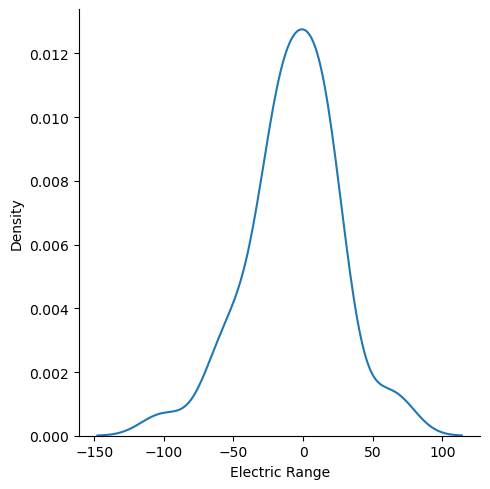

In [25]:
sns.displot(pred1-y_test,kind='kde')

In [26]:
print("Train Score:",regress.score(x_train,y_train))
print("Test Score:",regress.score(x_test,y_test))

Train Score: 0.887848516995852
Test Score: 0.9057568920666967


In [27]:
mae = mean_absolute_error(y_test,pred1)
mae

24.601057642630167

In [28]:
r2 = r2_score(y_test,pred1)
r2

0.9057568920666967

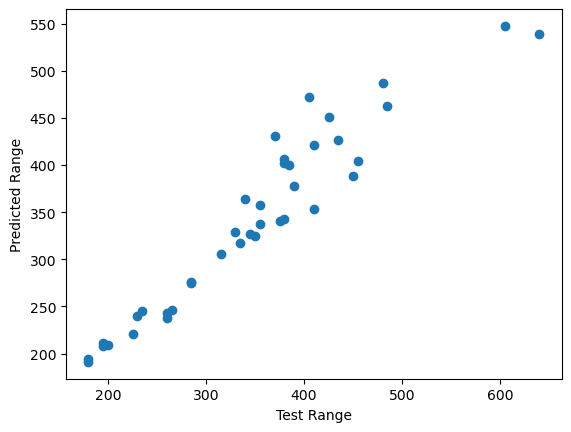

In [29]:
mtp.scatter(y_test,pred1)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

# Logestic Regression


In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
pred2=lr.predict(x_test)

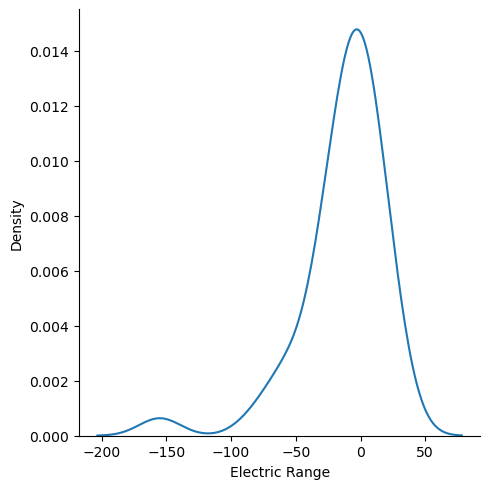

In [32]:
sns.displot(pred2-y_test,kind='kde')

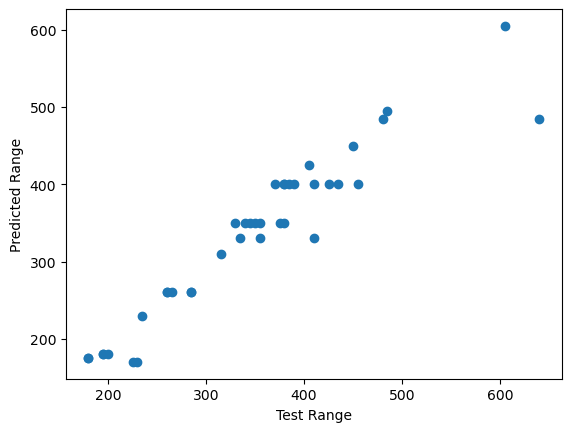

In [33]:
mtp.scatter(y_test,pred2)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

In [34]:
score=accuracy_score(pred2,y_test)
score

0.1282051282051282

In [35]:
mae = mean_absolute_error(y_test,pred2)
mae

21.923076923076923

In [36]:
r2 = r2_score(y_test,pred2)
r2

0.8875133221126686

# Ridge Regression

In [37]:
from sklearn.linear_model import Ridge

In [38]:
ridge_regress=Ridge()

In [39]:
ridge_regress.fit(x_train,y_train)

Ridge()

In [40]:
pred3=ridge_regress.predict(x_test)

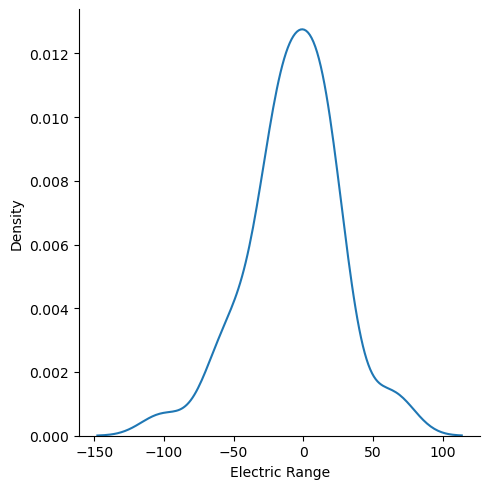

In [41]:
sns.displot(pred3-y_test,kind='kde')

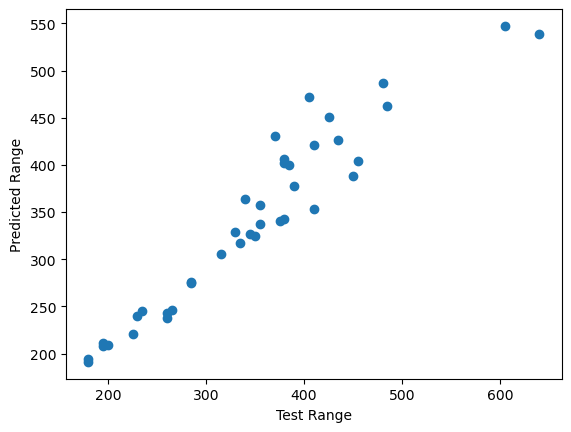

In [42]:
mtp.scatter(y_test,pred3)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

In [43]:
print("Train Score:",ridge_regress.score(x_train,y_train))
print("Test Score:",ridge_regress.score(x_test,y_test))

Train Score: 0.8878482246727003
Test Score: 0.9057054169332267


In [44]:
mae = mean_absolute_error(y_test,pred3)
mae

24.603827137775852

In [45]:
r2 = r2_score(y_test,pred3)
r2

0.9057054169332267

# Lasso regression

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [48]:
pred4=lasso.predict(x_test)

In [49]:

print("Train Score:",lasso.score(x_train,y_train))
print("Test Score:",lasso.score(x_test,y_test))

Train Score: 0.8878234451664191
Test Score: 0.905445027789108


In [50]:
mae = mean_absolute_error(y_test,pred4)
mae

24.592240386566907

In [51]:
r2 = r2_score(y_test,pred4)
r2

0.905445027789108

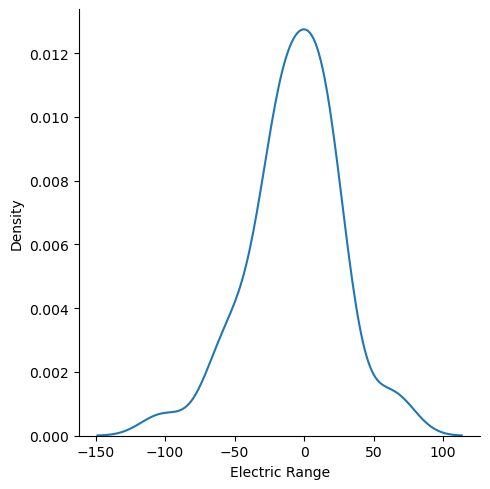

In [52]:
sns.displot(pred4-y_test,kind='kde')

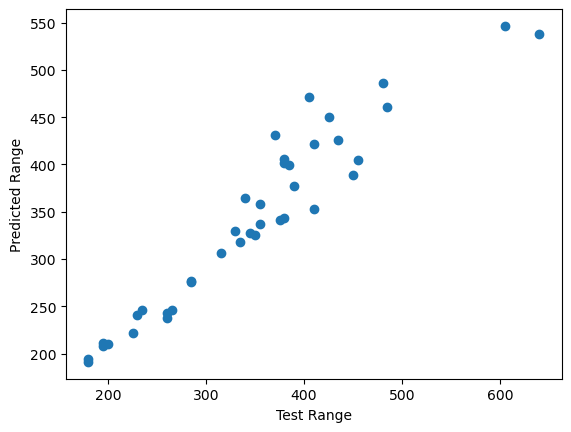

In [53]:
mtp.scatter(y_test,pred4)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

# RandomForestRegressor


In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [55]:
pred5=forest_reg.predict(x_test)

In [56]:
print("Train Score:",forest_reg.score(x_train,y_train))
print("Test Score:",forest_reg.score(x_test,y_test))

Train Score: 0.9883913345713702
Test Score: 0.9410508198559173


In [57]:
mae = mean_absolute_error(y_test,pred5)
mae

18.060256410256407

In [58]:
r2 = r2_score(y_test,pred5)
r2

0.9410508198559173

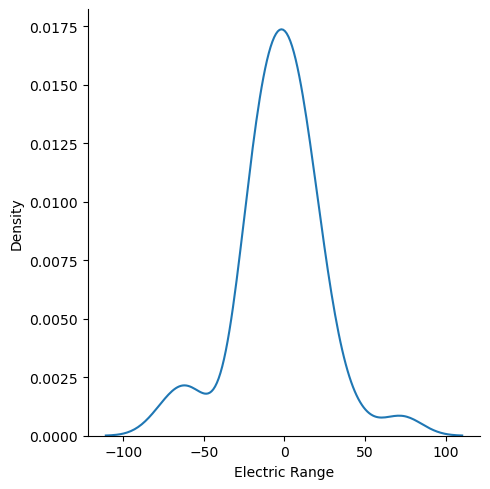

In [59]:
sns.displot(pred5-y_test,kind='kde')

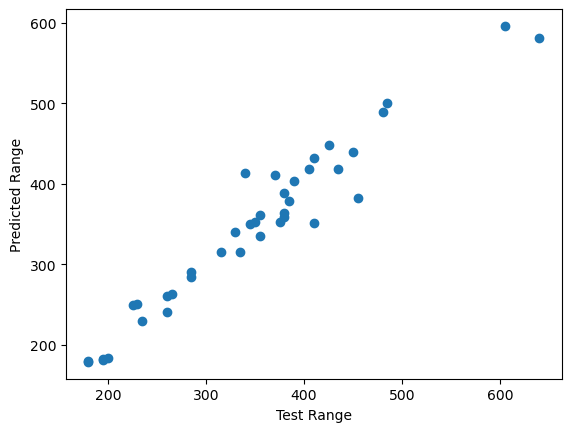

In [60]:
mtp.scatter(y_test,pred5)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

# Decision Tree

In [61]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
pred6=classifier.predict(x_test) 

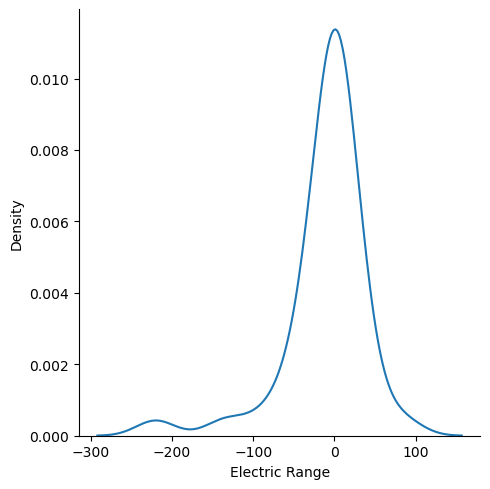

In [63]:
sns.displot(pred6-y_test,kind='kde')

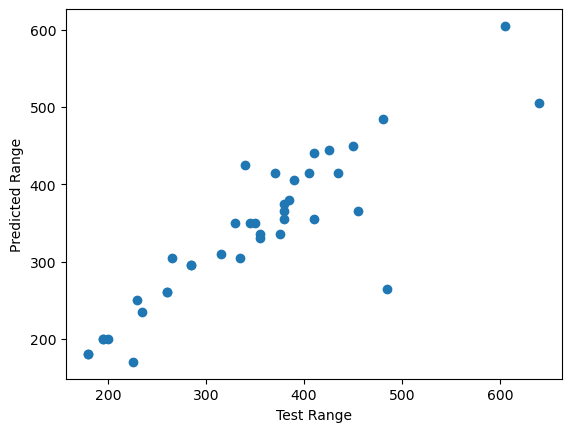

In [64]:
mtp.scatter(y_test,pred6)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

In [65]:
score=accuracy_score(pred6,y_test)
score

0.23076923076923078

In [66]:
mae = mean_absolute_error(y_test,pred6)
mae

27.435897435897434

In [67]:
r2 = r2_score(y_test,pred6)
r2

0.7746859475734827

# KNeighbours

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier2=KNeighborsClassifier()
classifier2.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
pred7=classifier2.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


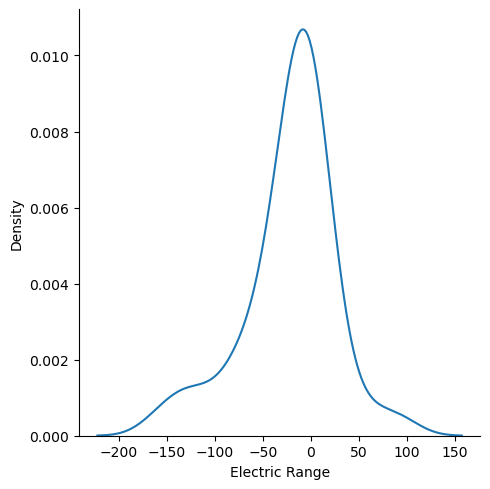

In [70]:
sns.displot(pred7-y_test,kind='kde')

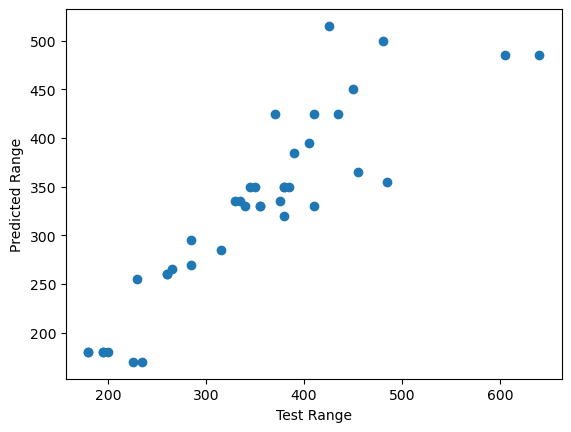

In [71]:
mtp.scatter(y_test,pred7)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

In [72]:
score=accuracy_score(pred7,y_test)
score

0.20512820512820512

In [73]:
mae = mean_absolute_error(y_test,pred7)
mae

33.205128205128204

In [74]:
r2 = r2_score(y_test,pred7)
r2

0.7697458461215909

# SVM

In [75]:
from sklearn.svm import SVC 
classifier3 = SVC(kernel='linear', random_state=0)
classifier3.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [76]:
pred8=classifier3.predict(x_test)

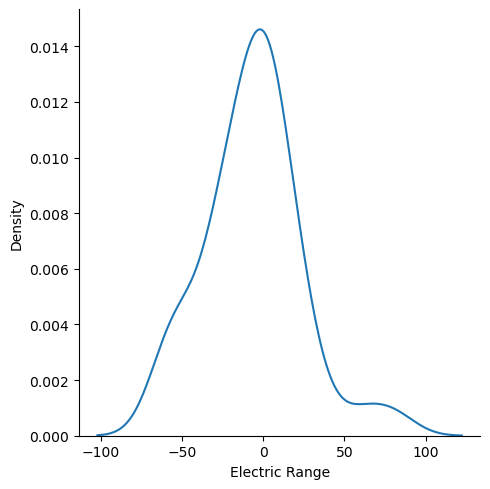

In [77]:
sns.displot(pred8-y_test,kind='kde')

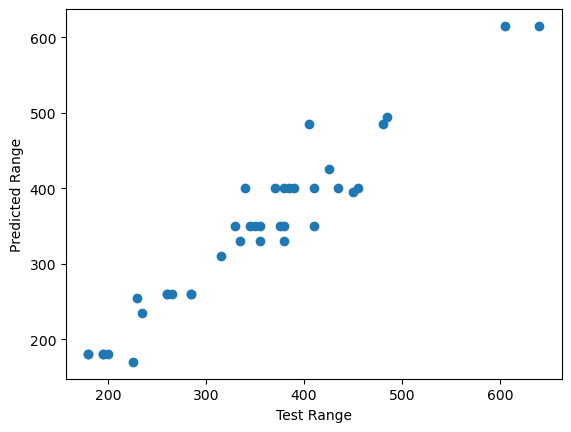

In [78]:
mtp.scatter(y_test,pred8)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

In [79]:
score=accuracy_score(pred8,y_test)
score

0.1794871794871795

In [80]:
mae = mean_absolute_error(y_test,pred8)
mae

21.41025641025641

In [81]:
r2 = r2_score(y_test,pred8)
r2

0.9219236839499846

# Random Forest Classifier


In [82]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
pred9=rf.predict(x_test)

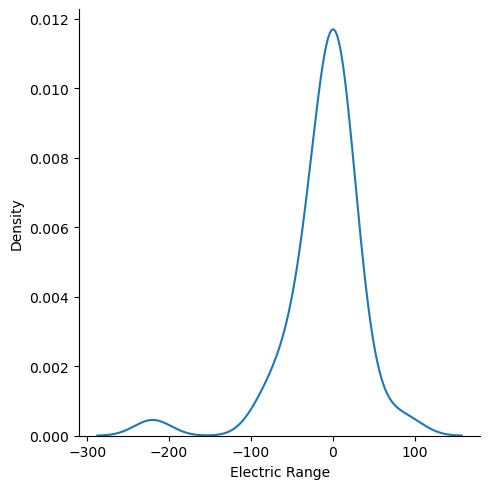

In [84]:
sns.displot(pred9-y_test,kind='kde')

In [85]:
score=accuracy_score(pred9,y_test)
score

0.2564102564102564

In [86]:
mae = mean_absolute_error(y_test,pred9)
mae

26.28205128205128

In [87]:
r2 = r2_score(y_test,pred9)
r2

0.8010899380922152

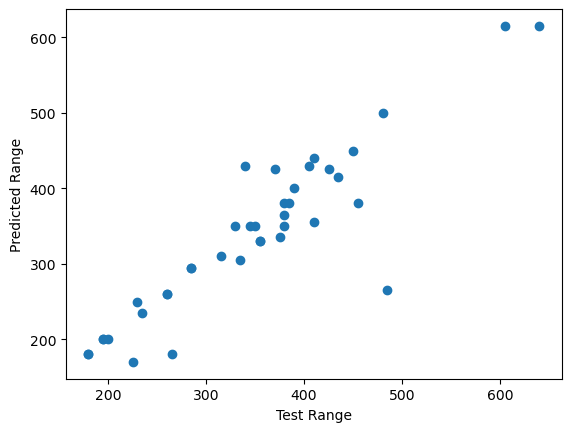

In [88]:
mtp.scatter(y_test,pred9)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()

# Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(x_train, y_train)

GaussianNB()

In [90]:
pred10=bayes.predict(x_test)

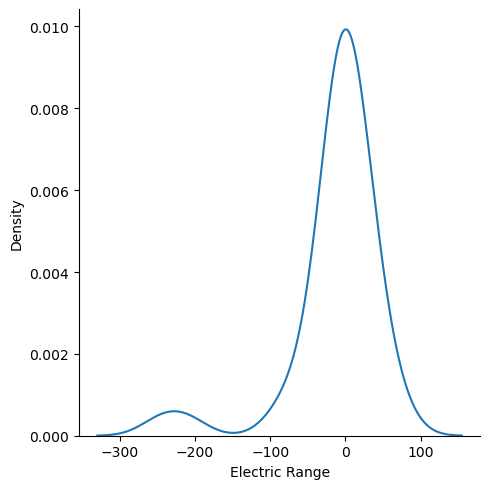

In [91]:
sns.displot(pred10-y_test,kind='kde')

In [92]:
score=accuracy_score(pred10,y_test)
score

0.1282051282051282

In [93]:
mae = mean_absolute_error(y_test,pred10)
mae

31.53846153846154

In [94]:
r2 = r2_score(y_test,pred10)
r2

0.6899660468123023

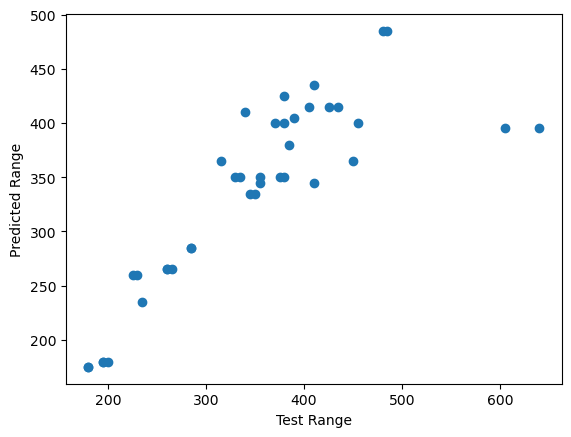

In [95]:
mtp.scatter(y_test,pred10)
mtp.xlabel("Test Range")
mtp.ylabel("Predicted Range")
mtp.show()